In [1]:
# -*- coding: utf-8 -*-

**Sisällysluettelo**

- [Väkkärä](#Väkkärä)
- [Tietokoneavusteista insinöörilaskentoa](#Tietokoneavusteista_insinöörilaskentoa)
- [Alustuksia](#Alustuksia)
  - [Pieniä esimerkkejä](#Pieniä_esimerkkejä)
- [Väkkärän tilayhtälön johtaminen](#Väkkärän_tilayhtälön_johtaminen)
    - [Newtonin laki](#Newtonin_laki)
    - [Lagrangen mekaniikka](#Lagrangen_mekaniikka)
    - [Järjestelmän potentiaali- ja liike-energia](#Järjestelmän_potentiaali-_ja_liike-energia)
    - [Tilayhtälöiden johtaminen Lagrangen periaatteella](#Tilayhtälöiden_johtaminen_Lagrangen_periaatteella)
- [Koodin generointi simulointia varten](#Koodin_generointi_simulointia_varten)
- [Optimiohjauksen laskeminen](#Optimiohjauksen_laskeminen)
  - [Optimointikriteeri](#Optimointikriteeri)
  - [Loppukustannus](#Loppukustannus)
  - [Hamiltonin funktio](#Hamiltonin_funktio)
- [Koodin generointi](#Koodin_generointi)

# Väkkärä

Oheinen väkkärä hyppelehtii Outomerellä ponttoniensa varassa. Sitä ohjataan jalkoja ja niiden välistä vartta lyhentämään ja pidentämään pyrkivillä voimilla.   

![väkkärä](vakkara.png "Outomerellä hyppelehtivä väkkärä")

Alkuperäinen tavoite oli laatia algoritmi, joka saa väkkärän hyppelehtimään iloisesti ja heittämään vaikka volttia, mutta onnistuin saamaan aikaiseksi vain [pari pikku hypähdystä](vakkara.webm) (video)

Voimat, nopeudet ja paikat ajan funktiona

![Järjestelmän tilat ja voimat](tilat_hyppy.png "tilat")

![Järjestelmän tilat](xy_hyppy.png "xy")


## Liian monimutkainen tehtävä käsityöksi

* Jotta voisin edes simuloida väkkärää, tarvitsen sen liikeyhtälöt. 
* Hypyn vaatimat ohjausvoimat lasken Pontryaginin minimiperiaatteella, mikä johtaa numeerisesti ratkaistavaan kahden pisteen reuna-arvotehtävään

Tein kaiken tietokoneella, koska tehtävä vaati lausekkeiden pyörittelyä enemmän kuin mihin käsivoimani ja istumalihakseni riittivät. Simulointiin ja optimiohjauksen numeeriseen iterointiin tarvittavat lausekkeet olivat nekin liian monimutkaisia käsin koodattavaksi.  

Ratkaisun alussa valitaan koordinaatisto, jossa järjestelmän tila esitetään. Vasta kolmannella osuin toimivaan. Joka yrityksellä piti kaikki laskea alusta loppuun uudestaan. Käsityönä siinä olisi mennyt ikä ja terveys. Tietokone laski kaiken uudestaan muutamassa sekunnissa. 

Virheitäkin tuli. Onneksi tietokoneen siististi auki kirjoittamat välivaiheet auttoivat virheen paikallistamisessa. Tietokoneen ansiosta riitti korjata virhe, ei laskea kaikkea käsin uudestaan.

Kuvaajiakin annoin tietokoneen piirrellä, että minulle hahmottui, millaisia muutamista keksimistäni Outomeren luonnonlaeista seuraa. Kuvaajien piirtämisessä tietokone on paljon nopeampi ja tarkempi kuin minä. Se osaa piirtää sellaistakin, mihin käden taitoni ei riitä.

Varsinainen asia alkaa luvusta [Väkkärän tilayhtälön johtaminen](#Väkkärän_tilayhtälön_johtaminen)

## Tietokoneen tarjoamat apuvälineet

Maxima olisi sopiva symboliseen laskentaan, mutta minä otin käyttöön pythonin, koska sillä muutenkin ohjelmoin ja koska sillä on tarvittaessa helppo lisätä ohjelmanpätkiä ratkaisuun. Tämä "työkirja" on osittain python-kielinen ohjelma, joka on laadittu jupyterlab-nimisellä sovelluksella.

Lausekkeiden pyörittelyyn käytän sympy-kirjaston metodeja. Niitä ei ollut ihan helppo oppia käyttämään eikä niiden lukeminenkaan liene ihan helppoa. Ohjelmointiin tottumaton voi onneksi keskittyä matemaattisessa muodossa tulostettuihin lausekkeisiin. Jutun olen tosin kirjoittanut sillä mielellä, että siitä olisi apua tällaisesta ohjelmoinnista kiinnostuneille.

Juttu on pikkuisen sekava, mutta antanee yleisvaikutelman tietokoneen tarjoamista matematiikan apuvälineistä.

Ensimmäisellä lukukerralla voit hypätä suoraan [pikku esimerkkiin](vakkara.html#pikkuesimerkki)

# Tietokoneavusteista_insinöörilaskentoa

## Alustuksia

Python-ohjelmien alussa luetellaan python-moduleja, joiden funktiota käytetään hyväksi. Asian ymmärtämisen kannalta näillä ei ole merkitystä. 

Pyörittelen tässä ohjelmassa symbolisia lausekkeita, joista generoidaan python-koodia numeerista laskentaa varten. Koodista tulee niin monimutkaista, etteivät sen lausekkeet  mahdu yhdelle riville. `textwrap`-paketista löytyvä metodi `fill` osaa katkoa rivit automaattisesti pythonin hyväksymällä tavalla.

`... import fill` tarkoittaa, että voin kutsua funktiota `fill` suoraan. 

In [2]:
from textwrap import fill, wrap
# from IPython.display import display

Re-modulissa on `regular expressions` funktioita merkkijonojen käsittelyyn. `Regular expressions` on käytettävissä kaikissa kunnollisissa editoreissa ja kaikki ohjelmointikielet tukevat niitä. `Regular expressions`-funktioita on vaikea oppia käyttämään, mutta ne nopeuttavat editointia ja ohjelmoinnissa ei aina edes selviä ilman niitä.

In [3]:
import re

Symboliseen laskentaan käytetään sympy-modulia. Ellei sitä ole tarjolla järjestelmäsi ohjelmistopaketeissa, voit installoiden sen komennolla `pip install sympy`.

Numpy-moduli tarjoaa numeerisen laskennan apufunktioita. `import numpy` muotoinen import komento edellyttää, että esimerkiksi `numpy`-modulin funktioita `array` kutsuessani, minun pitää `numpy.array`

`... as sp` tarkoittaa, että voin tästä ohjelmasta kutsua sympy:n funktioita lisäämällä funktion nimen eteen `sp.` Tämä tekee koodista selkeämpää. 

Tyylikkäintä olisi ollut käyttää vain yhtä import-muotoa, mutta tulin kokeilleeksi kaikkia vaihtoehtoja.


In [4]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy
import math # matemaattisia funktioita kuten sin(), cos(), exp(), 

par on itse kirjoittamani moduli, jossa annan arvot väkkärän parametreille

In [5]:
import par

Allaoleva varmistaa, että matemaattiset lausekkeet tulostetaan niin hyvin, kuin tietokoneesi sallii. Olen installoinut LaTeX ohjelmiston yms. joten minulle yhtälöt tulostuvat siististi. 

(`init_printing()`-funktiolle voi antaa monenlaisia parametreja, mutta niihin perehtyminen ei tuntunut hyödylliseltä.)

In [6]:
sp.init_printing()

<a id="pikkuesimerkki"/>

## Pieniä_esimerkkejä

Ennen kuin siirrytään tarkastelemaan väkkärän ohjaamisen matematiikka, tarkastellaan tietokoneavusteista matematiikkaa pienen esimerkin avulla.

Funktio, sen derivaatta ja derivaatan 0-kohdat

Käskyllä `y = sp.Function('y')(t)` muuttujalle y annetaan arvoksi määrittelemätön funktio y(t).

Käskyllä `sp.dsolve(sp.diff(y, t) - y)` ratkaistaan differentiaaliyhtälö $\frac{d}{dt}y(t) = y(t)$

Muotoa `sp.dsolve(sp.diff(y, t) = y)` ei voi käyttää vaan on käytettävä joko muotoa `sp.dsolve(sp.diff(y, t) - y)` tai `sp.dsolve(sp.Eq(sp.diff(y, t), y))`

Yhtälöä `a = b` ei voi tulostaa sellaisenaan `display`-funktiolla, vaan `a = b` pitää korvata lausekkeella `sp.Eq(a,b)`.


### Symbolisten muuttujien esittely

Python ohjelmointikielen muuttujien tyyppejä ei yleensä määritellä, mutta symbolisen laskennan muuttujat pitää määritellä. Symboliset muuttujat tulkitaan matemaatisiksi lausekkeiksi tai funktioiksi

'f1: '

'df1: '

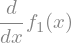

In [7]:
a, b, c , d, x = sp.symbols("a, b, c , d , x")
f1 = sp.Function('f_1')
display('f1: ', f1(x))
df1 = sp.diff(f1(x),x)
display('df1: ', df1)

'f1(x) '

'df1(x) '

'derivaatan 0-kohta '

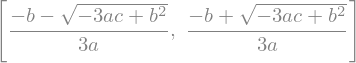

In [8]:
# funktion lauseke
f1 = a*x**3 + b*x**2 + c*x + d
display('f1(x) ', f1)
# funktion derivaatan lauseke
df1 = sp.diff(f1,x)
display('df1(x) ', df1)
# derivaatan 0-kohtien lausekkeet
x0 = sp.solve(df1,x)
display('derivaatan 0-kohta ', x0)

Lasketaan derivaatan 0:kohdille numeerinen arvo sjoittamalla a:lle, b:lle ja c:lle arvot. Evalf laskee lausekkeen arvon, mutta ei listalle, joten lasketaan arvot erikseen kullekin listan alkiolle

In [9]:

parsubs = {a: 1, b: -2, c: 3}
xr0 = [xi0.evalf(subs=parsubs) for xi0 in x0]
display(xr0)

### koodin generointi

Kirjoitetaan python-moduliin `p.fy` funktiot f(x) ja df(x)

Sympy-lausekkeen muuttaminen merkkijonoksi `str()`-funktiolla näyttää riittävän, mutta kokeilenpa myös `sp.pycode()`-funktiota 

In [10]:
with open('f.py', 'w') as fil:
    fil.write('def f(x,a,b,c,d):\n')
    fil.write('    return ')
    fil.write(str(f1))
    fil.write('\n\n')
    
    fil.write('def df(x,a,b,c):\n')
    fil.write('    return ')
    fil.write(sp.pycode(df1))
    fil.write('\n\n')


Tulostetaan tiedoston sisältö.

In [11]:
with open('f.py', 'r') as fin:
    print(fin.read())

def f(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

def df(x,a,b,c):
    return 3*a*x**2 + 2*b*x + c




### Funktioiden piirtäminen

Tehdään aliohjelma piirtämistä varten. 

Tämä työkirja on samalla python-ohjelma, eikä ole kovin tyylikästä kirjoittaa yhtä pitkää pääohjelmaa. Toisaalta työkirjan lukeminen käy vaikeaksi, jos kaikesta tekee aliohjelmia.

Tämä on monimutkainen, mutta samalla yleiskäyttöinen esimerkki 

In [12]:
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams.update({'font.size': 8})

In [13]:
def piirto_demo(f1, df1):

# Muunnetaan symboliset lausekkeet numeerisiksi lausekkeiksi piirtämistä varten
    g = sp.lambdify(x,f1)
    dg = sp.lambdify(x,df1)
    display('g(0.5) ', g(0.5), 'dg(0.5)', dg(0.5))

# Sijoitetaan kertoimille a, b, c ja d muutamia arvoja, tulostetaan parametrit, 
# derivaatan 0.kohtien arvon ja piirretään funktion g ja sen derivaatan dg kuvaajat. 

    # x-akselin pisteet, jossa funktion ja sen derivaatan arvot piirretään.
    xskaala = 1.0 
    xx = [xskaala*i for i in range(-11,12)]

    # Määritellään koordinaatistot
    s, sxarr = plt.subplots(14, 4, figsize=(10, 26))
    s.subplots_adjust(hspace=0.5)

    i = 0
    j = 0
    for ar in range(-1,2,2):  # {-1, 1}
        for br in range(-1,2): # range(-1,2) = {-1, 0, 1}
            for cr in range(-1,2):
                for dr in range(-1,2):
                    parsubs = {a: ar, b: br, c: cr, d: dr}
                      # funktion arvo x-akselin pisteissä xx
                    yy1 = [g(x).evalf(subs=parsubs) for x in xx]
                    yy2 = [dg(x).evalf(subs=parsubs) for x in xx]  # funktion derivaatan arvo
                    sxarr[i,j].set_title(str(parsubs))
                    sxarr[i,j].plot(xx, yy1, label="g")
                    sxarr[i,j].plot(xx, yy2, label="dg")
                    sxarr[i,j].grid(True)
                    sxarr[i,j].legend()
                    j = j+1
                    if j == 4:
                        j = 0
                        i = i+1
    plt.show()

'g(0.5) '

'dg(0.5)'

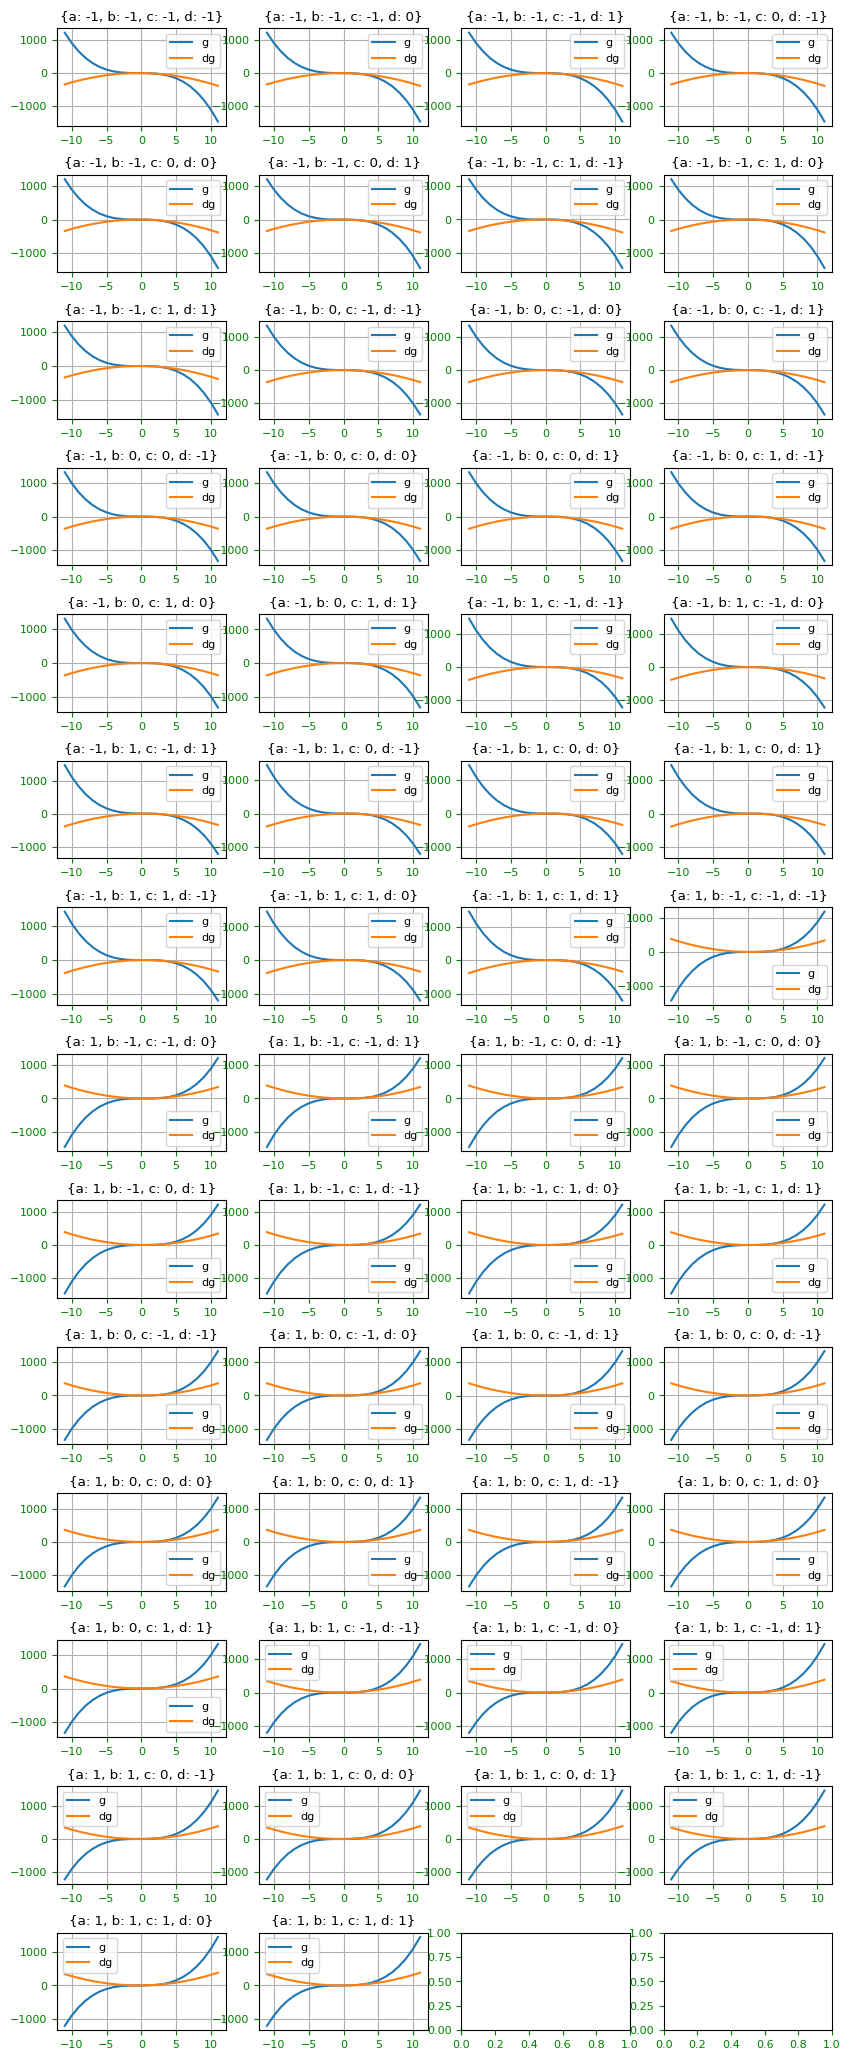

In [14]:
piirto_demo(f1, df1)

### Operaatiota matriiseilla: 

Transpoosi, kertolasku ja summa

'B '

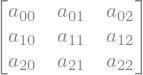

'u ja v:n transpoosi'

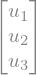

In [15]:
B = sp.Matrix([[sp.symbols("a_"+str(i)+str(j)) for j in range(0,3)] for i in range(0,3)])
u = sp.Matrix([sp.symbols("u_" + str(i)) for i in range(1, 4)])
v = sp.Matrix([sp.symbols("v_" + str(i)) for i in range(1, 4)])
display("B ", B)
display("u ja v:n transpoosi", u, v.T)

Muodostin yllä matriisit B, u ja v kimurantilla, mutta pythonmaisella tavalla. `sp.symbols` palauttaa palauttaa symbolisen muuttujan, jonka nimeksi tulee sen argumenttina oleva merkkijono. Pythonissa listoja käsitellään usein noin, että for-silmukka on "listan sisällä". Saman voisi tehdä tavallisessa for-silmukassa, mutta ylläoleva lienee laskennallisesti tehokkaampi ja kätevä, kun siihen tottuu.

Matriisin tai vektorin transpoosissa `u.T` rivit on käännetty sarakkeiksi tai toisinpäin.

Matriiseja voi kertoa tai laskea yhteen, kunhan dimensiot täsmäävät. 


uvt: vektorien tulo


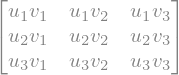

In [16]:
uvt = u * v.T
print("uvt: vektorien tulo")
display(uvt)

In [17]:
utv = u.T * v
print("utv: vektorien pistetulo")
display(utv)

utv: vektorien pistetulo


In [18]:
udotv = u.dot(v)
print("udotv: vektorien pistetulo 'virallisella merkinnällä'")
display(udotv)

udotv: vektorien pistetulo 'virallisella merkinnällä'


btb: matriisi kerrottuna itsellään


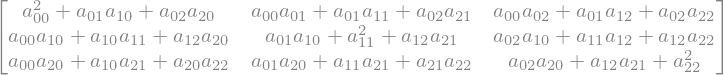

In [19]:
btb = B * B
print("btb: matriisi kerrottuna itsellään")
display(btb)

bpb: matriisi lisättynä itseensä


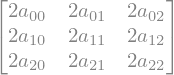

In [20]:
bpb = B + B
print("bpb: matriisi lisättynä itseensä")
display(bpb)

### Matriisien derivaattoja

Jatkossa tarvitsemme monen muuttujan funktion gradienttia eli matriisia, jossa kukin alkio on funktion osittaisderivaatta yhden muuttujan suhteen. Lisäksi saatetaan tarvita jacobian matriisia ja hessian matriisia, joista näytän myöhemmin esimerkin.

On pitkä juttu selittää, mihin näitä tarvitaan. Vielä pitempi jutusta tulee, jos selittää kunnolla. Tyydyn pariin yleiseen toteamukseen, joiden jälkeen näytän niistä esimerkin

Numeeristen menetelmien "käyttöohjeissa" pyydetään kirjoittamaan funktiot, jotka palauttavat gradientin, jacobin matriisin tai hessian matriisin. Helpottaa, jos tietää, mitä ne tarkoittavat.

Funktion $y = f(x_i), i = 0..n$ gradientti tietyssä pisteessä kertoo, kuinka jyrkästi $y$ muuttuu kutakin muuttujaa $x_i$ muutettaessa. Kun gradientti on jossain pisteessä nolla, piste on yksi funktion ääripisteistä.

Numeerisin menetelmin haetaan usein funktion minimiä tai maksimia. Gradienttia käytetään apuna päätettäessä, mistä suunnasta ja kuinka kaukaa ääriarvoa haetaan.

Jacobian matriisi on vektoriarvoiselle funktiolle $\underline y = \underline f(x_i), i = 0..n$ sama kuin gradientti yksiarvoiselle funktiolle.

Hessian matriisi on gradientin jacobin matriisi. Selviää parhaiten allaolevasta esimerkistä. Numeeriset optimointimenetelmät tarvitsevat tätä, mutta laskevat sen itse, ellei käyttäjä ohjelmoi sitä valmiiksi. $ y = H(\underline x_0)\underline x$ on funtkion lineaariapproksimaatio pisteessä $\underline x_0$, mihin perustuu sen hyödyllisyys numeerisissa menetelmissä.  

Funktion $f(\mathbf x)$ gradienttia voi kutsua $f$:n derivaataksi vektorin $\mathbf x$ suhteen ja merkitä $grad\,f = \frac{d}{d\mathbf x}f(\mathbf x) = f_{\mathbf x}(\mathbf x)$

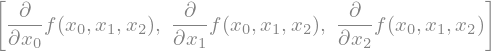

In [21]:
f = sp.Function("f")
xx = [sp.symbols("x_" + str(i)) for i in range(0, 3)]
gradfx = [0 for i in range(0, 3)]

for i in range(0, 3):
    gradfx[i] = sp.diff(f(xx[0], xx[1], xx[2]), xx[i])

display(gradfx)

In [22]:
xx = sp.Matrix([sp.symbols("x_" + str(i)) for i in range(0, 3)])
display(xx.T)

In [23]:
ff = [sp.Function("f_" + str(i)) for i in range(0, 3)]
# ff = [sp.Function("f_" + str(i))(xx) for i in range(0, 3)]
display(ff)

[f_0, f_1, f_2]

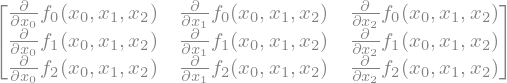

In [24]:
jacob_ff = sp.eye(3)
for i in range(0, 3):
    for j in range(0, 3):
        jacob_ff[i, j] = sp.diff(ff[i](xx[0], xx[1], xx[2]), xx[j])      
display(jacob_ff)

## Esimerkki gradientista ja jacobin/hessian matriisista

In [25]:
xx = [sp.symbols("x_"+str(i)) for i in range(0, 3)]
print('xx:')
display(xx)

f = xx[0]**2 + xx[0] * xx[1] + sp.sin(xx[0]) * sp.cos(xx[2]) + 3 * xx[2]
print('f:')
display(f)

dfdx = [0 for i in range(0, 3)]
for i in range(0, 3):
    dfdx[i] = sp.diff(f, xx[i])
print('dfdx:')
display(dfdx)

xx:


f:


dfdx:


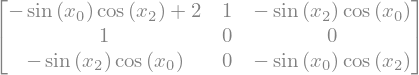

In [26]:
Hessian = sp.eye(3)  # Matriisi pitää jotenkin esitellä/alustaa ennen käyttöä
for i in range(0, 3):
    for j in range(0, 3):
        Hessian[i, j] = sp.diff(dfdx[i], xx[j])
display(xx, dfdx, Hessian)

<a id="tilayhtalo"/>

# Väkkärän_tilayhtälön_johtaminen

Miten saada selkoa siitä, miten [kuvan 1](#kuva1) väkkärä reagoi sitä liikuttaviin voimiin?

Tilayhtälöllä tarkoitetaan differentiaaliyhtälöä, joka kertoo, miten väkkärän tila — tilamuuttujien arvo — muuttuu ajan myötä ja miten ulkoiset ohjaukset vaikuttavat siihen.

Tilamuuttujat pitää valita niin, että niiden tietynhetkisen arvon ja ja tuosta hetkestä eteenpäin vaikuttavien ulkoisten voimien perusteella voidaan päätellä, mitä järjestelmälle tapahtuu tuosta hetkestä eteenpäin.

Tykinkuulan lentorata hetkestä t eteenpäin voidaan laskea, jos tiedetään kuulan paikka ja nopeus hetkellä t. väkkärässä on kolme "kuulaa". 

Mikäli jalkojen massa olisi jakautunut — ne olisivat sauvoja, joilla on inertiamomentti — tarvittaisiin lisäksi kunkin osan pyörimisnopeus tilamuuttujaksi. Se vähintäänkin hidastaisi ratkaisun laskemista.

## Newtonin_laki

Vektoriesitystä käytetään eräänlaisena lyhennysmerkintänä niin, että voimme käyttää samoja yhtälöitä riippumatta siitä, tarkastelemmeko 1,2 vai 3 -ulotteista avaruutta.

Vektorien avulla voimme
merkitä 
$\underline{F}(t)=m \underline{a}(t) = m\underline{\dot{v}}(t) = m\underline{\ddot{x}}(t)$
niin tasossa kuin 2 tai 3 -ulotteisessakin avaruudessa. 

Tästä saamme differentiaaliyhtälön $\underline{\ddot{x}}(t) = \underline{F}(t)/m$

Juonipaljastus: Homman edetessä saamme aikaiseksi differentiaaliyhtälöitä, joita ei voi ratkaista kuin numeerisilla menetelmillä. 
Differentiaaliyhtälöiden numeeriset ratkaisumenetelmät taas soveltuvat usein
ainoastaan sellaisille differentiaaliyhtälöryhmille, joissa on vain ensimmäisiä
derivaattoja. Niin minunkin valitsemani (= löytämäni).

Sijoituksilla $\underline{a}(t) \mapsto \underline{\dot{v}}(t) \text{ ja } 
\underline{v}(t) \mapsto \underline{\dot{x}}(t)$ saamme ensimmäisen kertaluvun differantiaaliyhtälöryhmän. 

## Lagrangen_mekaniikka

Yhtälössä $\underline{F}(t)=m \underline{a}(t)$ esiintyvien voimien lausekkeiden ratkaiseminen osoittautui minulle liian vaikeaksi. Sen sijaan, että olisin saman tien päässyt kirjoittamaan koodia jouduinkin opiskelemaan aivan uusia asioita mekaniikasta.

Googlaimella minulle selvisi, että [Lagrangen mekaniikka](http://en.wikipedia.org/wiki/Lagrangian_mechanics) saattaisi auttaa. Lagrangen mekaniikkaa sovellettaessa voimien lausekkeiden sijasta kirjoitetaan liike- ja potentiaalienergian lausekkeet, mikä sopivasti valitussa koordinaatistossa on paljon helpompaa kuin yrittää ratkaista voimien lausekkeita.

Myöhemmin opin, että, vaikka järjestelmän sisäisiä voimia ei tarvitse miettiä lainkaan, ulkoiset voimat aiheuttavat päänvaivaa.  

Lagrangen mekaniikan mukaisissa esimerkkiratkaisuissa neuvottiin valitsemaan koordinaatisto niin, että järjestelmän liike- ja potentiaalienergian lausekkeiden kirjoittaminen on mahdollisimman helppoa. Eli luovutaan xy-koordinaatistosta. [Tämä wikipedia artikkeli](http://en.wikipedia.org/wiki/Generalized_coordinates) auttanee ymmärtämään koordinaatiston valintaa. (Ei se kyllä helppoa ollut.)

Lagrangen mekaniikan mukaan järjestelmän liike- ja potentiaalienergian erotukselle $L$ ja q-koordinaatistossa esitetyille ulkoisille voimille  $Q$ pätee:

$$ \frac{d}{dt}(\frac{\partial L}{\partial \dot q_{i}}) - 
\frac{\partial L}{\partial q_{i}} = Q_i, \text{    } i = 1 \dots n $$

Sitä, miksi liike- ja potentiaalienergian erotuksen dervioinnilla monella eri tavoin, on jotain järkeä, ei voi ymmärtää ylläolevaa yhtälöä tuijottamalla eikä "maalaisjärjellä." Yritin ymmärtää yhtälön johtamista ja mielenkiintoiselta vaikutti, mutta syvimpiä perusteita en osaa selittää. Variaatiolaskenta oli keskeistä ja sitä en lähde tässä esittelemään.

Ulkoisten voimien laskemista selitetään mm wikipedia artikkelissa [generalized forces](https://en.wikipedia.org/wiki/Generalized_forces). 

[virtual work and generalized forces](https://en.wikipedia.org/wiki/Rigid_body_dynamics#Virtual_work_of_forces_acting_on_a_rigid_body)

Löysin samalle asialle mielestäni [yksinkertaisemman muotoilun](http://www.me.rochester.edu/courses/ME407/Lecture10.pdf). Sen mukaan

$$ Q_i = \frac{\partial \dot W}{\partial \dot q_i} \text{  ja  } 
\dot W = \mathbf{F}\cdot \mathbf{v} + \mathbf{\tau}\cdot \mathbf{\omega} $$

Voimien $Q_i$ yhtälö on johdettu virtuaalityön käsitteen avulla. Virtuaalityön idea on laskea järjestelmän siirtämiseen tilasta A tilaan B tarvittava energia kahdella toisistaan äärettömän vähän poikkeavaa polkua pitkin. Jonkun teoreeman mukaan virtuaalityö minimoituu fysiikan lakeja vastaavalla polulla. Tai niin ymmärsin teorioita äkkiseltään silmäilemällä. Toisaalta $\mathbf F\cdot \mathbf v$ on tehon kaava. Lagrangen mekaniikka on tunnettu siitä, että yhtälöiden fysikaalinen tulkinta "maalaisjärjellä" ei ole aina helppoa. Jätetään siis enempi hämmästely. 

Yhtälö näyttää joka tapauksessa pahalta. Onneksi voimme jättää sen ratkaisemisen tietokoneelle, kunhan ensin onnistumme kirjoittamaan liike- ja potentiaalienergian lausekkeet. Siinäkin suurimman osan työstä jätämme tietokoneelle. 


### Tilayhtälöt q-koordinaatistossa

Järjestemän paikan q-koordinaatistossa ilmoittavat massojen paikat.

Järjestelmän tilamuuttujiksi tarvitaan myös massojen nopeudet, eli paikkavektorin derivaatta ajan suhteen.

l0: Massojen etäisyydet toisistaan lepotilassa
m1: "Ohjaushytin" a massa
m2: Kellukkeiden b ja c massat
(ax, ay): Ohjaushytin paikka xy-koordinaatistossa
(vax, vay): Ohjaushytin nopeus xy-koordinaatistossa

In [27]:
l0, m1, m2, t = sp.symbols('l_0, m_1, m_2, t', real=True)
ax = sp.Function('a_x', real=True)
ay = sp.Function('a_y', real=True)
bx = sp.Function('b_x', real=True)
by = sp.Function('b_y', real=True)
cx = sp.Function('c_x', real=True)
cy = sp.Function('c_y', real=True)

vax = sp.Function('va_x', real=True)
vay = sp.Function('va_y', real=True)
vbx = sp.Function('vb_x', real=True)
vby = sp.Function('vb_y', real=True)
vcx = sp.Function('vc_x', real=True)
vcy = sp.Function('vc_y', real=True)

Kun tilayhtälöitä johdetaan Lagrangen mekaniikan mukaisesti, tarvitaan vielä vektorin q toinen derivaatta ajan suhteen. 

In [28]:
q = sp.Matrix([ax(t), ay(t), bx(t), by(t), cx(t), cy(t)])
sysdim = len(q)
display("paikka ", q.T)

'paikka '

'nopeus '

'kiihtyvyys '

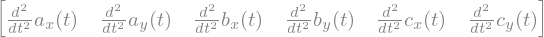

In [29]:
dqdt = sp.Matrix(sp.diff(q,t))
dqdt = sp.diff(q,t)

display("nopeus ",dqdt.T)

d2qdt2 = sp.Matrix(sp.diff(q,t,2))
display("kiihtyvyys ",d2qdt2.T)

### rajoitusyhtälöt
Massojen keskinäiset etäisyydet

In [30]:
lab2 = (ax(t)-bx(t))**2 + (ay(t)-by(t))**2
lac2 = (ax(t)-cx(t))**2 + (ay(t)-cy(t))**2
lbc2 = (bx(t)-cx(t))**2 + (by(t)-cy(t))**2

lab = sp.sqrt(lab2)
lac = sp.sqrt(lac2)
lbc = sp.sqrt(lbc2)

## Järjestelmän_potentiaali-_ja_liike-energia

Lagrangen mekaniikassa tilayhtälöiden johtamisessa käytetään apuna järjestelmän potentiaali- ja liike-energiaa. Ellei järjestelmään vaikuttaisi ulkoisia ohjaus- tai kitkavoimia, voimia ei tarvitsisi miettiä lainkaan.


### Potentiaalikenttä 

Halusin ratkaista optimointitehtävän suoraviivaisesti. Optimointialgoritmeja on helpoin soveltaa järjestelmiin, joiden tilayhtälö on jatkuva ja jatkuvasti derivoituva.

Kun robotin jalka on ilmassa, mikään ei rajoita sen liikkeitä. Kun jalka osuu maahan, tilanne hypähtää aivan toiseksi. En löytänyt näppärää ratkaisua, joten loin Outomeren, jonka luonnonlait helpottavat tehtävää.

Ilmassa kappaleeseen kohdistuu Maan vetovoima. Vedessä kellukkeisiin kohdistuu Maan vetovoimaa suurempi noste. Sain näiden kahden muodostamasta potentiaalikentästä jatkuvasti derivoituvan "sopimalla", että veden noste kasvaa eksponentiaalisesti syvyyden funktiona. 

In [31]:
hf1, hf2, hf3, mx, Ks, Cfrx, Cfry, g  = sp.symbols('hf1 hf2 hf3 mx K_s C_frx C_fry g', real=True)
h, vh, x, vx = sp.symbols('h vh x vx', real=True)

y = sp.Function('y')
v = sp.Function('v')
#vy = sp.Function('vy')

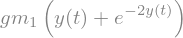

In [32]:
def potFn(h,mx):
    potF = mx*g*(h + sp.exp(-2*h))
    return potF
                 
display(potFn(y(t), m1))

In [33]:
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
evsubs = {m1:1.0, g:9.81, Cfrx: par.C_frx, Cfry: par.C_frx, hf1: 1, hf2: 0, hf3: -1, m2: 2}


 potentiaalienergia


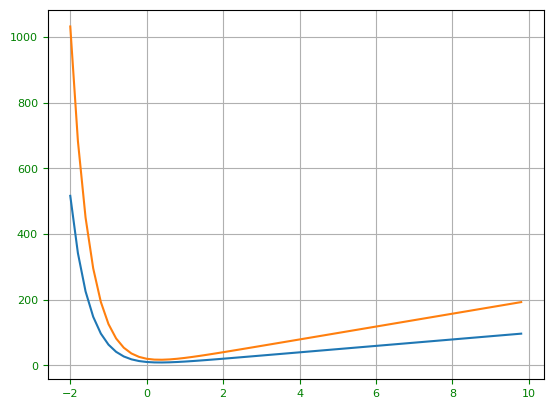

In [34]:
print("\n potentiaalienergia")
hh2 = [0.2*i for i in range(-10, 50)]
zz = [potFn(z,1).evalf(subs=evsubs) for z in hh2]
plt.plot(hh2, zz)
zz = [potFn(z,2).evalf(subs=evsubs) for z in hh2]
plt.plot(hh2, zz)
plt.grid(True)
plt.show()

### Väkkärän potentiaalienergia

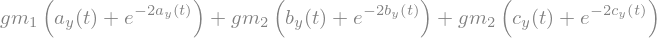

In [35]:
Vg = potFn(q[1],m1) + potFn(q[3],m2) + potFn(q[5],m2) 
display(Vg)

### massojen paikat ja nopeudet xy-koordinaatistossa q-koordinaattien avulla

In [36]:
vaq = dqdt[0:2,:]
vbq = dqdt[2:4,:]
vcq = dqdt[4:6,:]
display(vaq.T, vbq.T, vcq.T)

In [37]:
### Kineettinen energia

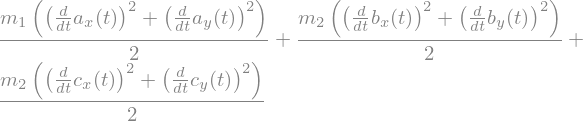

In [38]:
E_kin = (m1*vaq.dot(vaq) + m2*vbq.dot(vbq) + m2*vcq.dot(vcq))/2
display(E_kin)

## Tilayhtälöiden_johtaminen_Lagrangen_periaatteella

Lagrangen mekaniikkaa sovellettaessa muodostetaan langrangen funktio L, joka on järjestelmän kineettisen ja potentiaalienergian erotus ja ratkaistaan yhtälöistä

$$ \frac{d}{dt}(\frac{\partial L}{\partial \dot q_{i}}) - 
\frac{\partial L}{\partial q_{i}} - \mu_{i}f_{i} = 
Q_i, \text{    } i= 1 \dots n $$

$$ Q_i = \frac{\partial \dot W}{\partial \dot q_i} $$

$$f{i} \text{ on rajoitusyhtälö i ja } \dot W = \mathbf F\cdot \mathbf v$$

Kiihtyvyydet $\ddot q(t) = $ {{d2qdt2}} niin, että saadaan yhtälö

$$ \mathbf{\ddot{q}}(t) = \mathbf{f}(\mathbf{\dot{q}}(t), \mathbf{q}(t)) + \mathbf{u} $$

Meidän siis pitää kirjoittaa järjestelmän potentiaali- ja liike-energian lausekkeet sekä lauseke ohjausten $u_i$ ja ulkoisten voimien $F_i$ teholle.

### Kitka

Tavoite on jättää ilmanvastus huomiotta ja vedessä käyttää nopeuteen verrannollista 
viskoosia kitkaa.

Koska menetelmäni vaatii, että kitka on jatkuva funktio, käytän eksponenttifunktiota. Ilmassa kitka on hyvin pieni ja voimistuu nopeasti, mitä syvemmälle 'veteen' mennään.

Ajattelin, että väkkärän pitää voida potkaista vauhtia ja jarruttaa tehokkaasti, mutta kellukkeet olisi hyvä muotoilla niin, että ne voi nostaa vedestä vähällä kitkalla. Tätä kuvaamaan voin käyttää vaaka- ja pystysuoralla kitkalle eri kerrointa.

In [39]:
def frict(h, v, Cfr):
    F = -sp.exp(-3*h)
    return Cfr*F*v

display(frict(y(t), v(t), Cfrx))



 kitka


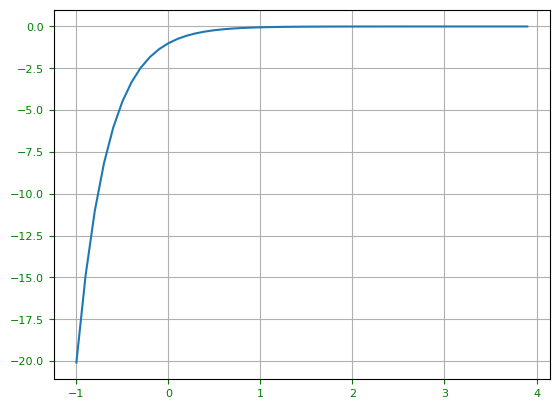

In [40]:
print("\n kitka")
hh = [0.1*i for i in range(-10, 40)]
fr = [frict(h,1.0, 1.0).evalf(subs=evsubs) for h in hh]
plt.plot(hh, fr)
plt.grid(True)
plt.show()

### Ohjaukset ja ulkoiset voimat

In [41]:
Fab, Fac, Fbc = sp.symbols('Fab, Fac, Fbc', real=True) # Vetävät "kolmiota" kasaan !!!

In [42]:
Fabx = Fab*(bx(t)-ax(t))/lab
Faby = Fab*(by(t)-ay(t))/lab

Fbax = -Fabx
Fbay = -Faby

Facx = Fac*(cx(t)-ax(t))/lac
Facy = Fac*(cy(t)-ay(t))/lac

Fcax = -Facx
Fcay = -Facy

Fbcx = Fbc*(cx(t)-bx(t))/lbc
Fbcy = Fbc*(cy(t)-by(t))/lbc

Fcbx = -Fbcx
Fcby = -Fbcy

In [43]:
Frbx = frict(q[3],dqdt[2], Cfrx)
Frcx = frict(q[5],dqdt[4], Cfrx)

Frby = frict(q[3],dqdt[3], Cfry)
Frcy = frict(q[5],dqdt[5], Cfry)

In [44]:
ohj = sp.Matrix([Fabx+Facx, Faby+Facy, Fbax+Fbcx+Frbx, Fbay+Fbcy+Frby, Fcbx+Fcax+Frcx, Fcby+Fcay+Frcy]) # ylin pallo ilman kitkaa !!!
 # display(ohj)

### Systeemiyhtälön johtaminen

In [45]:
Wu = ohj.dot(dqdt)
Qu = [sp.diff(Wu,dq) for dq in dqdt]

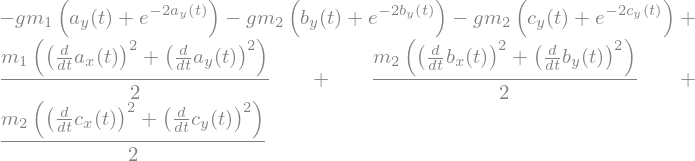

In [46]:
L = E_kin - Vg 
display(L)

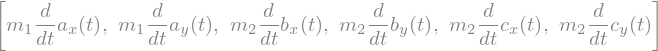

In [47]:
dl_1 = [sp.diff(L, dq) for dq in dqdt]
dl_1

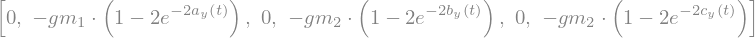

In [48]:
dl_2 = [sp.diff(L, qi) for qi in q]
dl_2


*******


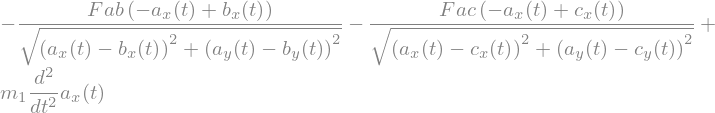


*******


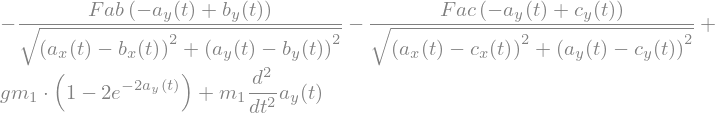


*******


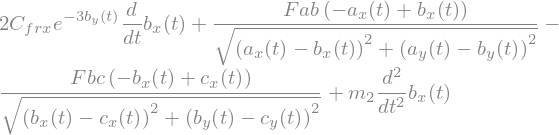


*******


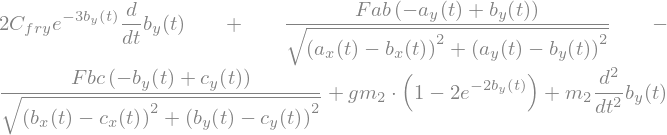


*******


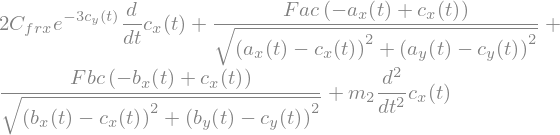


*******


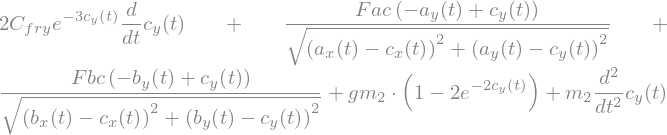

In [49]:
syseq = [sp.diff(dl_1[i], t) - dl_2[i] - Qu[i] for i in range(0, sysdim)]
for eq in syseq:
    print('\n*******')
    display(eq)

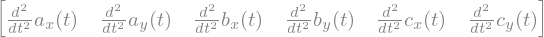

In [50]:
display(d2qdt2.T)
kiihtyvyydet = sp.solve(syseq, d2qdt2)
# display(kiihtyvyydet)

`Kiihtyvyydet` on tilayhtälön oikea puoli.Numeerinen ratkaisu vaatii tilayhtölän esittämistä ensimmäisen kertaluvun differentiaaliyhtlöinä, joten alamme vääntää ylläolevaa tilayhtälöä muotoon $\dot{\underline{z}}(t) = \underline{f}(\underline{z}(t))$

In [51]:
#f = sp.Matrix([0 for i in range(0, 2 * (sysdim))])
f = [0 for i in range(0, 2 * (sysdim))]

for i in range(0, sysdim):
    f[i] = sp.simplify(kiihtyvyydet[d2qdt2[i]])
    f[i + sysdim] = sp.simplify(dqdt[i])

In [52]:
dx = [sp.simplify(fi) for fi in f]

Joitakuita saattoi yllä hämmentää lauseke `f[i] = kiihtyvyydet[d2qdt2[i]]`.

sp.solve antaa yhtälön ratkaisun niin kutsuttuna dictionaryna, josta alla r on esimerkki. Dictionaryn alkiohin ei voi viitata numeroilla vaan pitää käyttää "avaimia", joita r:ssä ovat 'a' ja 'b'

In [53]:
r = {'a': 5, 'b': 7}
eka = r['a']
eka

Yhtälöryhmän ratkaisussa avaimina ovat muuttujien toiset derivaatat, joten voin käyttää avaimina matriisin d2qdt2 alkioita {{d2qdt2}} samoin kuin käytän alla listan ab alkioita.

(Itse ainakin hämmästelen, miten keksinkään tällaisen ratkaisun ;-)

### Tasapainotila

Lasketaan kuinka syvälle kellukkeet uppoavat lepotilassa ja millaiset voimat tarvitaan pitämään väkkärä levossa tasasivuisena kolmiona, jonka sivut ovat l0.

In [54]:
ds, v0, s0 = sp.symbols('ds v_0 s_0', real=True)
cfv, cfx, Cfb, Ctau, Cu, Cl = sp.symbols('c_fv, c_fx, C_fb, C_tau, C_u, C_l', real=True)
cfx0,cfx1,cfx2,cfx3,cfx4,cfx5 = sp.symbols('cfx_0,cfx_1,cfx_2,cfx_3,cfx_4,cfx_5', real=True) 
cfv0,cfv1,cfv2,cfv3,cfv4,cfv5 = sp.symbols('cfv_0,cfv_1,cfv_2,cfv_3,cfv_4,cfv_5', real=True) 
ax0, ay0, bx0, by0, cx0, cy0 = sp.symbols('ax_0, ay_0, bx_0, by_0, cx_0, cy_0', real=True)
avx0, avy0, bvx0, bvy0, cvx0, cvy0 = sp.symbols('avx_0, avy_0, bvx_0, bvy_0, cvx_0, cvy_0', real=True)
axf, ayf, bxf, byf, cxf, cyf = sp.symbols('ax_f, ay_f, bx_f, by_f, cx_f, cy_f', real=True)
avxf, avyf, bvxf, bvyf, cvxf, cvyf = sp.symbols('avx_f, avy_f, bvx_f, bvy_f, cvx_f, cvy_f', real=True)
cfxya, cfxybc, cfva, cfvbc = sp.symbols('cfxy_a, cfxy_bc, cfv_a, cfv_bc', real=True)
Fab0, Fac0, Fbc0 = sp.symbols('Fab0, Fac0, Fbc0')

sys_params = [
    g, m1, m2, l0, ds, ax0, axf, ay0, ayf, s0, bx0,
   bxf, cx0, cxf, avx0, avxf, avy0, avyf, bvx0, bvxf, bvy0, bvyf,
   cvx0, cvxf, cvy0, cvyf, Cfrx, Cfry, Ctau, Cu, Cl, cfxya, cfxybc,
   cfva, cfvbc, Cfb
]

In [55]:
dx0_subs = [(sp.diff(ax(t), t), par.avx_0),(sp.diff(ay(t), t), par.avy_0),
          (sp.diff(bx(t), t), par.bvx_0), (sp.diff(by(t), t), par.bvy_0),
          (sp.diff(cx(t), t), par.cvx_0), (sp.diff(cy(t), t), par.cvy_0),
           (ax(t), par.ax_0),(ay(t), by0+s0),(bx(t), par.bx_0),(by(t), by0), 
            (cx(t), par.cx_0),(cy(t), by0), (s0, par.s_0),
            (l0, par.l_0), (m1, par.m_1), (m2, par.m_2), (g, par.g),
            (Fab, Fab0), (Fac, Fac0),(Fbc, Fbc0) 
          ]
kiihtyvyydet = [sp.N(dxi.subs(dx0_subs)) for dxi in dx[:6]]
    
tasap = sp.nsolve(kiihtyvyydet, [Fab0, Fac0, Fbc0, by0],
                  [-10.0, -10.0, 10.0, 0], dict=True)[0]
display(tasap)

#  Koodin_generointi_simulointia_varten

Tässä kappaleessa generoidaan numeerisessa integroinnissa tarvittava funktio, joka palauttaa
tilamuuttujien derivaattojen arvot 

Matemaattisempi osuus jatkuu luvussa [Optimiohjauksen laskeminen](vakkara.html#optimiohjaus)

## Numeerinen integrointi

Kirjoitetaan simuloinnissa tarvittava funktio `fdxdt()`, joka palauttaa järjestelmämuuttujien derivaatat järjestelmän tilan ja ohjausten funktiona. Videopelimäisessä simulaattorissa  tätä funktiota käytetään seuraavasti: Generoimamme funktion `fdxdt()` nimi annetaan argumentiksi integrointifuntiolle `rk4`, joka kutsuu sitä laskiessaan järjestelmän siirtymää $yy(t) \to yy(t+\Delta t)$

```python
from dxdt_sympy import fdxdt
from rk4 import rk4

def liike(yy):
    uu = ohjaukset(yy)
    yy = rk4(fdxdt, yy, uu, Aika.Dt)
    return yy
```

rk4 taas on seuraavanlainen järjestelmää yhden aika-askeleen eteenpäin siirtävä funktio 
([runge-kutta integrointi](https://fi.wikipedia.org/wiki/Runge%E2%80%93Kutta-menetelm%C3%A4t))

```python
def rk4(fdydt, yy, uu, dt):
    kk1 = fdydt(yy, uu)
    yk1 = [yy[i] + k1 * dt / 2.0 for i, k1 in enumerate(kk1)]
    kk2 = fdydt(yk1, uu)
    yk2 = [yy[i] + k2 * dt / 2.0 for i, k2 in enumerate(kk2)]
    kk3 = fdydt(yk2, uu)
    yk3 = [yy[i] + k3 * dt for i, k3 in enumerate(kk3)]
    kk4 = fdydt(yk3, uu)
    yy1 = [
        y + dt / 6.0 * (kk1[i] + 2.0 * kk2[i] + 2.0 * kk3[i] + kk4[i])
        for i, y in enumerate(yy)
    ]
    return yy1
```


Alla ensiksi pari esimerkkiä selittämään, mitä kannattaa tehdä ennen koodin generoimista. Emme esimerkiksi halua python-koodiin turhaa Matrix-määrittelyä. (Tämä on amatöörin ajattelua, kokeneempi koodari tietänee paremman ratkaisun.)

In [56]:
esim1 = sp.Matrix([1, 2, 3])
print("esim1 tuottaisi tällaista koodia: ", esim1)

esim1 tuottaisi tällaista koodia:  Matrix([[1], [2], [3]])


In [57]:
esim2 = [x for x in esim1]
print("esim2 tuottaisi tällaista koodia: ", esim2)
esim2

esim2 tuottaisi tällaista koodia:  [1, 2, 3]


Häivytetään lausekkeista aika, eli korvataan kaikki f(t) f:llä. Liittyy koodin generointiin 

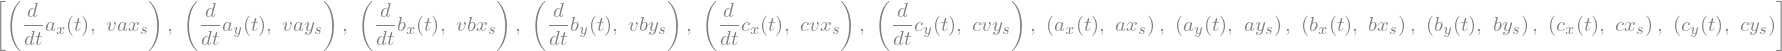

In [58]:
ax_s, ay_s, bx_s, by_s, cx_s, cy_s = \
    sp.symbols('ax_s, ay_s, bx_s, by_s, cx_s, cy_s', real=True)
vax_s, vay_s, vbx_s, vby_s, cvx_s, cvy_s = \
    sp.symbols('vax_s, vay_s, vbx_s, vby_s, cvx_s, cvy_s', real=True)

dx_subs = [(sp.diff(ax(t), t), vax_s),(sp.diff(ay(t), t), vay_s),
          (sp.diff(bx(t), t), vbx_s), (sp.diff(by(t), t), vby_s),
          (sp.diff(cx(t), t), cvx_s), (sp.diff(cy(t), t), cvy_s),
           (ax(t), ax_s),(ay(t), ay_s),(bx(t), bx_s),(by(t), by_s), (cx(t), cx_s),(cy(t), cy_s)
          ]
display(dx_subs)

In [59]:
# Nämä sijoitukset tehdään tämän ohjelman eri vaiheissa
sys_subs = [
    (g, par.g),
    (m1, par.m_1),
    (m2, par.m_2),
    (l0, par.l_0),
    (s0, par.s_0),
    (ax0, par.l_0/2),
    (axf, par.l_0/2+par.ds), 
    (ay0, by0 + par.s_0),
    (ayf, by0 + par.s_0), 
    (bx0, 0), (bxf, par.ds), 
    (cx0, par.l_0), (cxf, par.ds+par.l_0), 
    (cy0, by0), (cyf, by0),
    (avx0, par.avx_0), (avxf, par.avx_f), 
    (avy0, par.avy_0), (avyf, par.avy_f), 
    (bvx0, par.bvx_0), (bvxf, par.bvx_f), 
    (bvy0, par.bvy_0), (bvyf, par.bvy_f), 
    (cvx0, par.cvx_0), (bvxf, par.cvx_f), 
    (cvy0, par.cvy_0), (bvyf, par.cvy_f),
    (byf, by0),
    (by0, tasap[by0]), 
]
# esim. muuttujan cvxf paikalle kirjoitetaan koodiin 'par.cvx_f'
opt_subs = [
    (cvxf, 'par.cvx_f'), 
    (cvyf, 'par.cvy_f'),
    (Cu, 'par.C_u'),
    (Cl, 'par.C_l'),
    (Cfrx, 'par.C_frx'),
    (Cfry, 'par.C_fry'),
    (cfxya, 'par.cfxy_a'),
    (cfxybc, 'par.cfxy_bc'),
    (cfva, 'par.cfv_a'),
    (cfvbc, 'par.cfv_bc'),
    (Cfb, 'par.C_fb')
]

# display(par.sys_params)

In [60]:
with open('initSim.py', 'w') as fil:
    fil.write("# -*- coding: utf-8 -*-\n")
    fil.write("from math import *\n")
    fil.write("import par\n")

    for (Nam, Val) in sys_subs:
#        display(Nam, Val)
        if isinstance(Val, sp.Expr):
            Val = sp.N(Val.subs(sys_subs))
        fil.write("{} = {}\n".format(Nam, Val))

Valmistaudutaan generoimaan simuloinnissa tarvittava järjestelmän tilan derivaatan palauttava funktio. Muuttujien vaihdoilla saamme kuusi ensimmäisen kertaluvun differentiaalyhtälöä. 

In [61]:
#display(f)
#display(dx_subs)

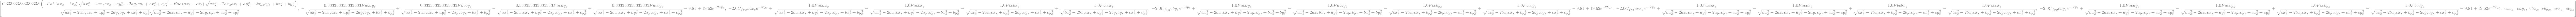

In [62]:
dxsim = [dxi.subs(dx_subs).subs(sys_subs) for dxi in dx]

#dx = [sp.expand(sp.powsimp(dxi)) for dxi in dx0]
display(dxsim)

Järjestelmän tilavektori 

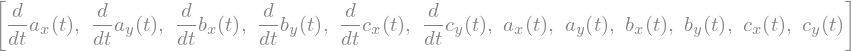

In [63]:
# yyx = [yi for yi in q.subs(dx_subs)]
# yyv = [yi for yi in dqdt.subs(dx_subs)]
yy = [*dqdt, *q]
display(yy)
yys = [yi.subs(dx_subs).subs(sys_subs) for yi in yy]
display(yys)

In [64]:
uu = [Fab, Fac, Fbc]

## Symbolisista lausekkeista merkkijonoja

Edelläjohdetut lausekkeet vaativat pientä manipulointia, ennenkuin ne voidaan kirjoittaa tiedostoon python-ohjelmaksi. Osa lausekkeista on listoja, jotka pitää käsitellä alkio kerrallaan niin, että tuloksenakin on lista.

Lausekkeesta `expr` syntyvä koodi kirjoitetaan tiedostoon `fil`, sitä sisennetään merkkijonon `indent` verran ja symbolisen lausekkeen osia korvataan listan `sys_subs` mukaan. 

In [65]:
def wr_expr(fil, expr, indent):
#    print(expr)
    if (type(expr) == list):
        dim = len(expr) - 1
        fil.write('[')
        for i, ex in enumerate(expr):
            wr_expr(fil, ex, indent)
            if (i < dim):
                fil.write(',')
        fil.write(']')

    else:
        subs_ex(fil, expr, indent)

Alla `subs_ex()`, eli lausekkeen, joka ei ole lista, kirjoittaminen koodiksi. 

Generoitavassa koodissa tilamuuttujat esitetään vektorina zz. 
Ennen tämän funktion kutsumista järjestelmän tilamuuttujat on `sympy.subs`-funktiolla koodattu muotoon zz(i), koska en sympy.subs-komennolla onnistunut saamaan niitä muotoon zz[i]. Esimerkiksi $v_{car} = zz(0)$, mutta haluamme sen muotoon $zz[0]$

Seuraavassa lauseke muutetaan ensin merkkijonoksi ja sen jälkeen käytetään regular expressions komentoja, jotka ovat muotoa re.sub(r'korvattava merkkijono', r'millä korvataan', merkkijono)

`r'[0-9]'` tarkoittaa mitä hyvänsä numeroa välitltä 0-9. `r'[0-9]*'` tarkoittaa edellinen yksi tai useampi kertaa, eli mikä hyvänsä numerojono. 

Edellinen käärittynä kaarisulkeisiin &#8212; `r'([0-9]*)'` &#8212; tarkoittaa, että löytyvään merkkijonoon voidaan myöhemmin viitata merkinnällä '\1'.

Kenoviiva &#8212; esimerkiksi '\\(' &#8212; tarkoittaa, että kenoviivaa seuraava merkki  &#8212; edellä '(' &#8212; otetaan sellaisenaan. 

In [66]:
display(opt_subs)

[(cvx_f, 'par.cvx_f'),
 (cvy_f, 'par.cvy_f'),
 (C_u, 'par.C_u'),
 (C_l, 'par.C_l'),
 (C_frx, 'par.C_frx'),
 (C_fry, 'par.C_fry'),
 (cfxy_a, 'par.cfxy_a'),
 (cfxy_bc, 'par.cfxy_bc'),
 (cfv_a, 'par.cfv_a'),
 (cfv_bc, 'par.cfv_bc'),
 (C_fb, 'par.C_fb')]

In [67]:
def subs_ex(fil, ex, indent):
    if isinstance(ex, sp.Expr):
        ex = sp.N(ex.subs(sys_subs))
    s = re.sub(r'zz\(([0-9]*)\)', r'zz[\1]', str(ex))
    # s2 = re.sub(r'pp\(([^)]*)\)', r'par.\1', s1)
    # s = re.sub(r'cf\(([0-9]*)\)', r'par.cf_\1', s2)
    for (a, b) in opt_subs:
        s = s.replace(str(a), b)
#    s = s.replace('Min', 'min')
#    s = s.replace('sign', 'numpy.sign')
#    s = re.sub(r'Derivative(*)', '0', s)
#    s = re.sub(r'DiracDelta\([^)]*\)', r'0', s)
#    s = re.sub(r'Heaviside\(([^)]*)\)', r'numpy.heaviside(\1,0.5)', s)
#    s = s.replace('Heaviside', 'numpy.heaviside')
    fil.write(
        fill(s,initial_indent=indent, subsequent_indent="    ", break_long_words=False))

Kirjoitetaan simulointiin tarvittava systeemiyhtälö

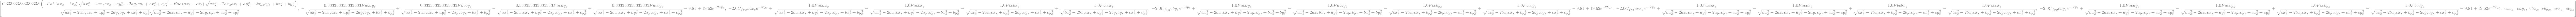

In [68]:
display(dxsim)

In [69]:
with open('dxdt.py', 'w') as fil:
    fil.write("# -*- coding: utf-8 -*-\n")
    fil.write("from math import sqrt, exp \n")
    # fil.write("import numpy\n")
    fil.write("import par \n\n")
    fil.write("E = exp(1.0)\n")

    fil.write("Musta = (0, 0, 0)\n")
    fil.write("Valk = (255, 255, 255)\n")
    fil.write("Sin = (0, 0, 255)\n")
    fil.write("Pun = (255, 0, 0)\n")
    fil.write("Vihr = (0, 255, 0)\n")
    fil.write("Kelt = (255, 255, 0)\n")

    fil.write("def fdxdt(yy, uu):\n    ")
    wr_expr(fil, yys, " ")
    fil.write(" = yy\n    ")
    wr_expr(fil, uu, "")
    fil.write(" = uu\n")
    fil.write("    dxdt =")
    wr_expr(fil, dxsim, " ")
    fil.write("\n")
    fil.write("    return dxdt\n")

In [70]:
# with open('par.py', 'r') as fin:
#    print(fin.read())
    
#with open('dxdt.py', 'r') as fin:
#    print(fin.read())

<a id="optimiohjaus"/>
# Optimiohjauksen_laskeminen

## Järjestelmän alku- ja lopputila

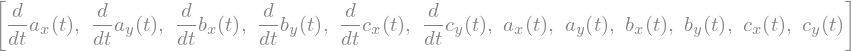

In [71]:
#ax0, ay0, avx0, avy0, ax, ay, bx0, by0, bvx0, bvy0, bx, by, cx0, cy0, cvx0, cvy0, cx, cy = \
#sp.symbols('ax_0, ay_0, avx_0, avy_0, ax_f, ay_f, bx_0, by_0, bvx_0, bvy_0, bx_f, by_f, \
#           cx_0, cy_0, cvx_0, cvy_0, cx_f, cy_f', real=True)

yy0 = [avx0, avy0, bvx0, bvy0, cvx0, cvy0, ax0, ay0, bx0, by0, cx0, cy0]
#yyf = [sp.N(0), sp.N(0), sp.N(0), sp.N(0), sp.N(0), sp.N(0), ax, ay, bx, by, cx, cy]
yyf = [avxf, avyf, bvxf, bvyf, cvxf, cvyf, axf, ayf, bxf, byf, cxf, cyf]
display(yy, yy0, yyf)

## Tilayhtälö

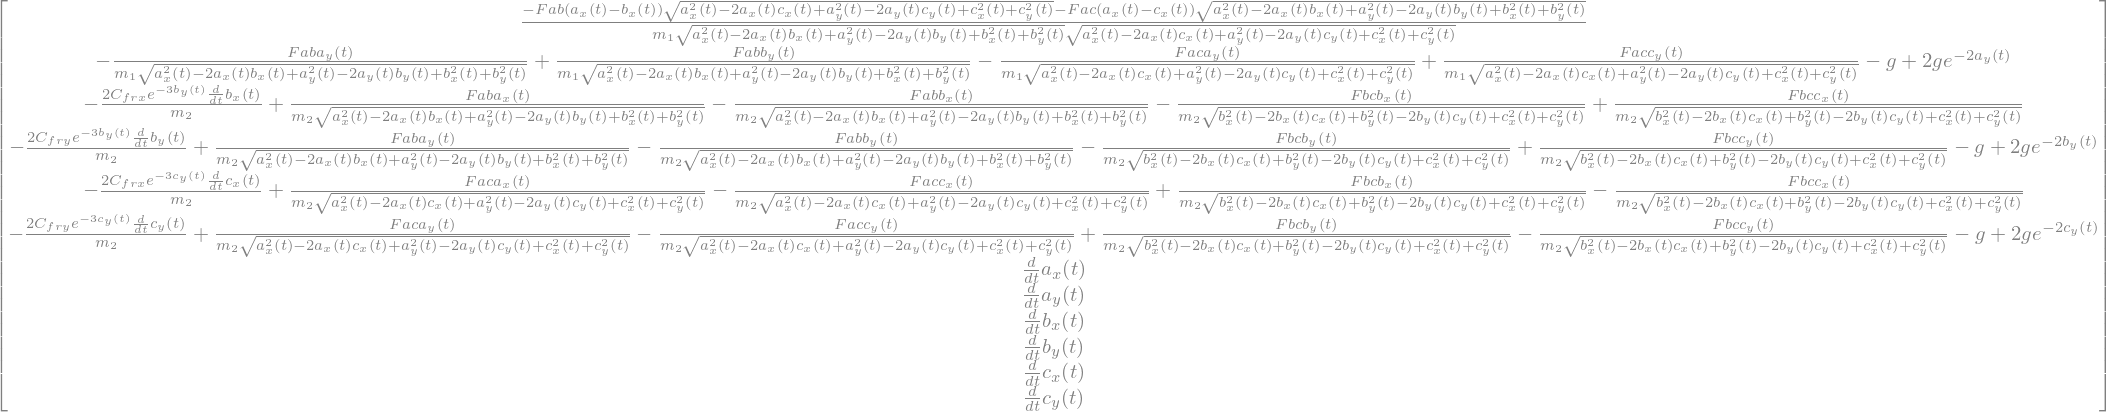

In [72]:
dx = sp.Matrix([dxi for dxi in dx])
display(dx)

## Optimointikriteeri

$$ J = G_f(\underline x(T_{f})) + \int_0^{T_{f}}gl(\underline x(t),\underline u(t),t) \,\mathrm{d}t $$

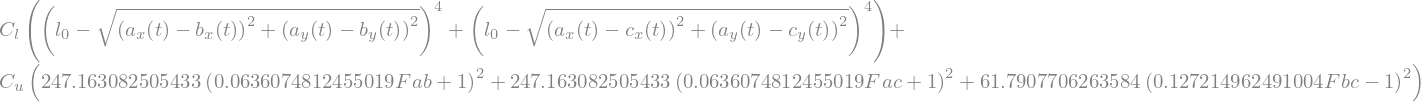

In [73]:
gl = Cu*((Fab-tasap[Fab0])**2 + (Fac-tasap[Fac0])**2 + (Fbc-tasap[Fbc0])**2) + \
    Cl*((lab-l0)**4 + (lac-l0)**4)  #  + (lbc-l0)**4)
gl = sp.simplify(gl)

display(gl)

Neliöllinen kustannus voimien poikkeamalle tasapainotilasta ei tarkkaan ottaen johda energian kulutuksen minimoimiseen, mutta on järkeenkäypä "käytännön" ratkaisu ja on melko helppo ratkaista.

Energian kulutuksen minimoimiseksi kustannuksen pitäisi kai olla $ gl(t) = \bar{F(t)} \cdot \bar{v(t)}$. Jäljempänä muodostettavan Hamiltonin funktion minimointi ohjausvoimien suhteen tulisi pikkuisen monimutkaisemmaksi ja itse optimointitehtävä ehkä vaikeammaksi saada konvergoimaan. (Houkuttaa kokeilla, mutta kokeilu voi koukuttaa moneksi päiväksi.)  


Jalkojen pituuden poikkeamaa lepotilasta sakotetaan neljänteen potenssiin. Tämä on eräänlainen tilarajoitus. Ilman tätä rajoitusta väkkärä venyttää jalkansa älyttömän pitkäksi ja tekee vain yhden pitkän loikan.

Numeerisessa optimoinnissa on vaikea löytää alkuarvausta, jolla ratkaisu konvergoi. Siksi tässä voisi aloittaa eksponentilla 2 ja käyttää näin saatua ratkaisua alkuarvauksena, kun nostaa eksponenttia iteratiivisesti.

Kustannuksessa sakotetaan neliöllisesti ohjausvoimia ja ison pallon korkeutta.
Millä perusteella tällainen kriteeri? Se on helppo laskea ja vie kuorman paikasta toiseen turhia tempoilematta.  


## Loppukustannus

Optimointialgoritmin voi vaatia viemään järjestelmä tarkalleen lopputilaan, mutta usein tehtävä ratkeaa helpommin, jos tarkan lopputilan vaatimisen sijasta käyttää nelilöllistä sakkoa poikkeamalle halutusta lopputilasta.



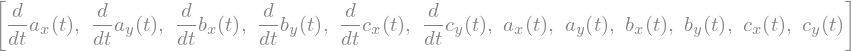

In [74]:
display(yy, yyf)
#cfx = [sp.symbols('cfx'+str(i)) for i in range(sysdim)]
#cfv = [sp.symbols('cfv'+str(i)) for i in range(sysdim)]
#display(cfx, cfv)

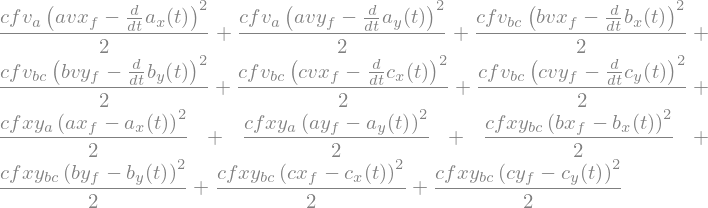

In [75]:
#cfxya, cfxybc, cfva, cfvbc 
G_f = 0
for i in range(2):
    G_f = G_f + cfva*(yy[i] - yyf[i])**2
for i in range(2, sysdim):
    G_f = G_f + cfvbc*(yy[i] - yyf[i])**2
for i in range(sysdim, sysdim+2):
    G_f = G_f + cfxya*(yy[i] - yyf[i])**2
for i in range(sysdim+2, 2*sysdim):
    G_f = G_f + cfxybc*(yy[i] - yyf[i])**2
G_f = sp.simplify(G_f/2)
display(G_f)

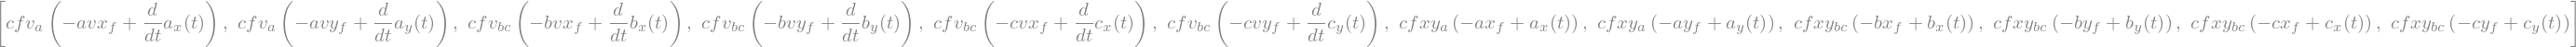

In [76]:
lamda_f = [sp.simplify(sp.diff(G_f, yy[i])) for i in range(0, 2 * sysdim)]
lamda_f

Sovelletaan [Pontryaginin minimiperiaatetta](https://en.wikipedia.org/wiki/Pontryagin%27s_minimum_principle), joka johtaa nk kahden pisteen reuna-arvotehtävään. Sellaisten ratkaisemiseen on kehitetty numeerisia algoritmeja, joita varten väännämme ongelman niiden vaatimaan standardimuotoon.

Tilamuuttujien lisäksi tarvitaan yhtä monta nk. liittotilamuuttujaa.

`H` on Pontryaginin periaatteen mukainen Hamiltonin funktio ja `yy_lt` järjestelmän liittotila

## liittotilamuuttujat

In [77]:
yy_lamda = sp.Matrix([sp.symbols('lamda_{}'.format(i)) for i in range(0,2*sysdim)])
display(yy_lamda.T)

## Hamiltonin_funktio

In [78]:
H = (yy_lamda.dot(dx) + gl) #.subs(sys_subs)
# H = sp.simplify(H)
#display(H)

<!--
sol = sp.solve(H, Tf)
sol
-->

## Ohjausvektori

In [79]:
u = sp.Matrix(uu)
u_lst = uu
display(u.T)

Optimaalinen ohjaus ajan funktiona löytyy minimoilla Hamiltonin funktio ohjauksen suhteen. 
Yksinkertaisen kustannusfunktiomme ansiosta minimi löytyy derivaatan 0-kohdasta

In [80]:
dHdu = [sp.diff(H, ui) for ui in u]
 #dHdu

In [81]:
uopt = sp.solve(dHdu, u)
uopt = sp.simplify(uopt)
 # display(uopt)

Hessian matriisia voidaan joissain tapauksissa käyttää apuna numeerisessa ratkaisussa.

```python
HessH = [[0 for i in range(0,udim)]for i in range(0,udim)]
for i in range(0,udim):
    for j in range(0,udim):
        HessH[i][j] = sp.diff(dHdu[i],u[j])
```

Liittotilan tilayhtälöt (= liittotilamuuttujien aikaderivaatat) saadaan derivoimalla hamiltonin funktio varsinaisilla tilamuuttujilla.

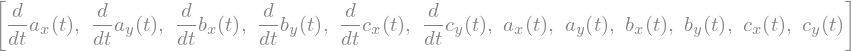

In [82]:
display(yy)
dlt = sp.Matrix([-sp.diff(H, yi) for yi in yy])
 #dlt = [sp.simplify(d) for d in dlt]
 # for dlti in dlt:
 #    display(dlti)

Optimiohjauksen numeerinen ratkaiseminen vaatii alkuarvauksen ratkaisulle ajan funktiona. Alkuarvauksen ei helpoissa tapauksissa tarvitse olla kovin hyvä, mutta ratkaisu ei välttämättä lähde konvergoimaan, jos alkuarvaus on esimerkiksi pelkkiä nollia.

In [83]:
display(yy0, yyf)
display(sys_subs)

In [84]:
guess_a = [0 for i in range(4*sysdim)]
for i in range(2*sysdim):
    guess_a[i] = yy0[i]
for i in range(2*sysdim, 4*sysdim):
    guess_a[i] = 0.0   

In [85]:
for i in range(0, 2*sysdim):  # subs ei onnistu reaaliluvuille, siksi vajaa range
    guess_a[i] = guess_a[i].subs(sys_subs)

In [86]:
display(guess_a)

In [87]:
guess_b = [0 for i in range(4*sysdim)]
for i in range(2*sysdim):
    guess_b[i] = yyf[i]
for i in range(2*sysdim, 4*sysdim):
    guess_b[i] = 0.0   

In [88]:
for i in range(0, 2*sysdim):  # subs ei onnistu reaaliluvuille, siksi vajaa range
    guess_b[i] = guess_b[i].subs(sys_subs)
display(guess_b)

Yhdistetään järjestelmän tilamuuttujat ja liittotilamuuttujat vektoriksi `z0` ja niiden aikaderivaatat vektoriksi `dz0`.

Tässä vaiheessa niiden lausekkeisiin voi sijoittaa optimaalisen ohjauksen lausekkeet kommenteissa esitetyllä tavalla tai voi generoida optimaaliset ohjaukset palauttava funktio osaksi numeerista ratkaisua.

Jälkimmäinen vaihtoehto antaa mahdollisuuden asettaa ohjauksilla helposti ylä- ja alarajat. 

In [89]:
z0 = sp.Matrix(yys).col_join(yy_lamda) 
dz0 = sp.Matrix(dx).col_join(dlt) # .subs(uopt) 
#display(z0.T, dz0)

Mikäli ohjauksen lausekkeet sijoittaa yhtälöihin jo tässä vaiheessa, numeerinen algoritmi voi käyttää hyödyksi esimerkiksi tilayhtälön jacobin matriisia.

Luodaan lista, jonka avulla voidaan korvata tilamuuttujat vektorilla `zz`. Koska sympy-lausekkeisiin on vaikea ujuttaa muotoa `zz[i]` olevia termejä, käytän funktio-muotoa `zz(i)`, jonka korvaan muodolla `zz[i]` koodin generoinnin yhteydessä.

In [90]:
zz_subs = [(Var, "zz(" + str(i) + ")") for i, Var in enumerate(z0)]

In [91]:
lab2 = sp.expand(lab2.subs(dx_subs))
lac2 = sp.expand(lac2.subs(dx_subs))
lbc2 = sp.expand(lbc2.subs(dx_subs))

lab = sp.sqrt(lab2)
lac = sp.sqrt(lac2)
lbc = sp.sqrt(lbc2)

# display(lab, lac, lbc)

In [92]:
lacTmp, labTmp, lbcTmp = sp.symbols('lacTmp, labTmp, lbcTmp') 
tmpVar = [(lac, lacTmp), (lab, labTmp), (lbc, lbcTmp)]

Kun en ehtinyt muuta ratkaisua hakea, muutan `sympy.Matrix`-muotoiset matriisit python-listoiksi alkio alkiolta sijoittaen.

In [93]:
z = [z0i.subs(tmpVar).subs(dx_subs).subs(sys_subs).subs(zz_subs) for z0i in z0]
dz = [dz0i.subs(tmpVar).subs(dx_subs).subs(sys_subs).subs(zz_subs) for dz0i in dz0]
lamda_f = [l_f.subs(tmpVar).subs(dx_subs).subs(sys_subs).subs(zz_subs) for l_f in lamda_f]

yy0 = [sp.simplify(yyi.subs(dx_subs).subs(sys_subs).subs(zz_subs)) for yyi in yy0]


In [94]:
optu = [0,0,0]
# display(uopt)
optu[0] = sp.simplify(uopt[Fab].subs(tmpVar).subs(dx_subs).subs(sys_subs).subs(zz_subs))
optu[1] = sp.simplify(uopt[Fac].subs(tmpVar).subs(dx_subs).subs(sys_subs).subs(zz_subs))
optu[2] = sp.simplify(uopt[Fbc].subs(tmpVar).subs(dx_subs).subs(sys_subs).subs(zz_subs))
# display(optu)

In [95]:
lab = sp.simplify(lab.subs(dx_subs).subs(sys_subs).subs(zz_subs))
lac = sp.simplify(lac.subs(dx_subs).subs(sys_subs).subs(zz_subs))
lbc = sp.simplify(lbc.subs(dx_subs).subs(sys_subs).subs(zz_subs))

# Koodin generointi

Ratkaisen kahden pisteen reuna-arvotehtävän scipy.integrate.solve_bvp algoritmilla, joka kutsuu alla generoitavia funktioita.
[Muutama esimerkki](https://rjleveque.github.io/amath585w2020/notebooks/html/BVP_scipy.html)

Näitä funktioita kutsutaan todella monta kertaa, joten ne olisi kannattanut koodata C-kielellä. En kuitenkaan jaksanut sitä opetella, joten tyydyin pythoniin. Tämähän on kuitenkin vain demo.

Joidenkin lausekkeiden ympärille olen laittanut "ylimääräiset" sulkeet, jotta python paremmin ymmärtäisi jatkorivejä, joita ne tuottavat.

Koodin generointi write-käskyillä on kömpelöä, mutta ei niin kömpelöä, että olisin jaksanut ryhtyä kehittämään jotain elegantimpaa.

In [96]:
fixedLoppu = False

with open('opt_dfuns.py', 'w') as fil:
    fil.write("# -*- coding: utf-8 -*-\n")
#    fil.write("#import scikits.bvp_sp.solver\n")
#    fil.write("#from scipy.optimize import minimize\n")
    fil.write("import numpy as np\n")
    fil.write("from math import sqrt, log, exp\n")
    fil.write("import par \n")
#    fil.write("from uopt import uopt \n")
    fil.write(" \n")
    fil.write("E = exp(1.0)\n")

    fil.write("def uopt(zz):\n")
#    fil.write("    T_f = P[0]\n")
    fil.write("    labTmp = ")
    wr_expr(fil, lab, " ")
    fil.write("\n    lacTmp = ")
    wr_expr(fil, lac, " ")
    fil.write("\n    lbcTmp = ")
    wr_expr(fil, lbc, " ")
    fil.write("\n    Fab = (")
    wr_expr(fil, optu[0], "")
    fil.write(")\n    Fac = (")
    wr_expr(fil, optu[1], "")
    fil.write(")\n    Fbc = (")
    wr_expr(fil, optu[2], "")
    fil.write(")\n")
    fil.write("    Flim = par.u_lim\n")
    fil.write("    Fab = min(Flim,max(-Flim,Fab))\n")
    fil.write("    Fac = min(Flim,max(-Flim,Fac))\n")
    fil.write("    Fbc = min(Flim,max(-Flim,Fbc))\n")
    fil.write("    return [Fab, Fac, Fbc]\n")
    fil.write(" \n")

    fil.write("# Muuttujien derivaatat\n")
    fil.write("def odefun(t, zz_N):\n")
    # fil.write("    T_f = P[0]\n")
    fil.write("    (M, N) = zz_N.shape\n")
    fil.write("    dzdt = np.zeros((M, N))\n")
    fil.write("    for i in range(N):\n")
    fil.write("        zz = zz_N[:, i]\n")
    fil.write("        [Fab, Fac, Fbc] = uopt(zz)\n")
    fil.write("        labTmp = ")
    wr_expr(fil, lab, " ")
    fil.write("\n        lacTmp = ")
    wr_expr(fil, lac, " ")
    fil.write("\n        lbcTmp = ")
    wr_expr(fil, lbc, " ")
    fil.write("\n        dzdt[:, i] = ")
    wr_expr(fil, dz, " ")
    fil.write("\n    return dzdt\n")
    fil.write(" \n")

    #fil.write("# Hamiltonia\n")
    #fil.write("def dhdu(zz, P):\n")
    #fil.write("    T_f = P[0]\n")
    #fil.write("    [Fab, Fac, Fbc] = uopt(zz, P)\n")
    #fil.write("    dhu = ")
    #wr_expr(fil, dHdu, " ")
    #fil.write("\n    return numpy.array(dhu)\n")
    #fil.write(" \n")

#    Allaoleva kestää ja kestää. Turha?
#    fil.write("def gradodefun(t,zz):\n")
#    fil.write("    [F_car, F_load] = uopt(zz)\n")
#    fil.write("    dxdf = ")
#    wr_expr(fil,jacdz,"    ", sys_subs)
#    fil.write("\n    return np.array(dxdf)\n")
#    fil.write(" \n")

    fil.write("# Reuna-arvot. Palauttaa poikkeaman halutusta.\n")
    fil.write("def bcfun(zz0,zz):\n")
    #fil.write("    T_f = P[0]\n")
    # fil.write("    print('Tf: {} '.format(T_f))\n")
#    fil.write("    [Fab, Fac, Fbc] = uopt(zz)\n")
    fil.write("    yy_0 = ")
    wr_expr(fil, yy0, "")
    fil.write("\n    bc0 = [zz0[i]-yy_0[i] for i in range(0,2*par.sysdim)]\n")
#    fil.write("    bcTf = (")
#    wr_expr(fil, H, "")
#    wr_expr(fil, dHdTf, "")
#        fil.write(")\n")

    if fixedLoppu:
        fil.write("\n    yy_f = ")
        wr_expr(fil, yyf, "")
        fil.write("\n    bcf = [zz[i]-yy_f[i] for i in range(0,2*par.sysdim)]\n")
    else:
        fil.write("\n    lamda_f = ")
        wr_expr(fil,lamda_f,"")
        fil.write("\n    bcf = [zz[i+2*par.sysdim]-lamda_f[i] for i in range(0,2*par.sysdim)]\n")

#    fil.write("\n    bcf = [*bcf, bcTf]\n")
    fil.write("    return np.array(bc0 + bcf)\n")
    fil.write(" \n")
    
    fil.write("# Alkuarvaus ajan funktiona\n")
    fil.write("def init_guess(t):\n")
    fil.write("    guess_a = "),
    wr_expr(fil, guess_a, "")
    fil.write("\n    guess_b = "),
    wr_expr(fil, guess_b, "")
    fil.write("\n    return np.array(guess_a), np.array(guess_b)\n")
    fil.write(" \n")

Esimerkki siitä, miten kopioida tiedoston sisältö toiseen tiedostoon.

```python
with open('opt_piirto.py', 'w') as fil:
    with open('opt_piirto_nogen.py', 'r') as fin:
        fil.write(fin.read())  
```

# Hajahuomioita

Käsivoimin yhtälöitä pyörittäville ja koodia kirjoittaville edelläesitetty voi näyttää hämmentävältä ja epäilyttävältäkin. Ohjelma kuitenkin toimii hienosti.

Matemaattisesta tehtävästä voi selvittää, onko sillä analyyttinen ratkaisu vai ei. Numeerisen ratkaisun löytymisestä ei voi olla varma. Esimerkiksi kahden pisteen reuna-arvotehtävien ratkaisemissa ratkaisun löytyminen saattaa riippua alkuarvauksesta ja tässä tehtävässä optimointikriteerissä käytetyistä kertoimista ja itse järjestelmän parametreistä.

Jos ratkaisu löytyykin, on vaikea tietää, onko se globaali vai lokaali optimi. Jos ratkaisu näyttää hyvältä ja toimii, se saattaa riittää kertaluonteisissa tehtävissä. Jos algoritmin tehtävä olisi esimerkiksi ohjata laiva automaattisesti laituriin, sen pitää antaa joka kerta vähintäänkin kelvollinen ratkaisu.


[Demovideolla](vakkara.webm) näemme, että optimiohjaus siirtää vakkaran siististi paikasta toiseen. Se on melko vahva osoitus siitä, että optimointialgoritmissa ei ole virheitä. Sen perusteella, että simulaattori toimii luonnollisen tuntuisesti, voi arvella, että tilayhtälöiden johtaminen onnistui.

Käytännössä etukäteen laskettu optimiohjaus ei toimisi noin hyvin, koska täydellisen tarkkaa mallia ei voi laatia kuin aivan yksinkertaisille järjestelmille. Lisäksi järjestelmään voi vaikuttaa ulkopuolisia häiriöitä, kuten tuulenpuuskat, joita ei voi ennakoida.

Optimiohjauksen laskemista käytetään kuitenkin hyväksi [malliprediktiivisessä säädössä](https://en.wikipedia.org/wiki/Model_predictive_control), jossa optimiohjaus lasketaan määrävälein uudestaan lähtien järjestelmän sen hetkisestä tilasta. Järjestelmän kulloinenkin tila määritetään mittaustietoon ja järjestelmän malliin perustuvalla tilaestimaattorilla.

# Kotisivuni

[Kotisivulleni](http://www.heikki-valisuo.fi/)

[Muuta ohjelmoinnista](https://www.heikki-valisuo.fi/html/OhjOpp.html)

In [97]:
print('valmis')

valmis
